In [0]:
#Import the libraries
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [40]:
#Get the stoke guote
df= web.DataReader('AAPL',data_source='yahoo',start='2015-01-01', end='2020-03-30')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,100.216454
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,97.393181
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,97.402374
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,98.768150
2015-01-08,112.150002,108.699997,109.230003,111.889999,59364500.0,102.563072
...,...,...,...,...,...,...
2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,224.369995
2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.880005
2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,245.520004


In [41]:
#Number of rows and coloumns in the data set
df.shape

(1318, 6)

<function matplotlib.pyplot.show>

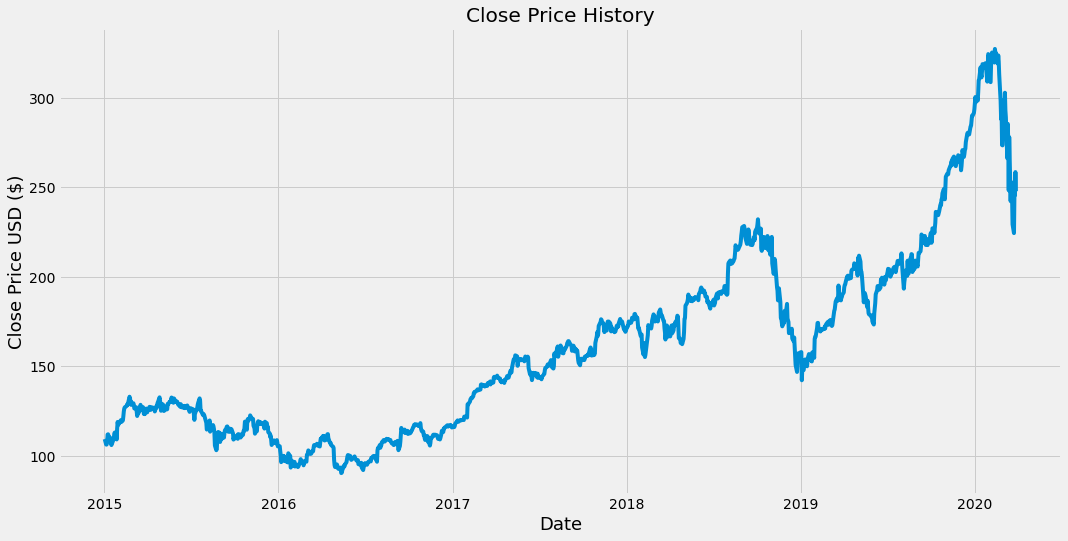

In [42]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show

In [43]:
#create a new dataframe with only the Close coloumn
data= df.filter(['Close'])
#convert it into a numpy array
dataset= data.values
#get the number of rows to train the model on
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

1055

In [44]:
#scale  the data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data
                                

array([[0.08017396],
       [0.06717049],
       [0.06721272],
       ...,
       [0.65515493],
       [0.70970191],
       [0.66452756]])

In [45]:
#create the training set
#for that frist we have to creat scaled training data set
train_data= scaled_data[0:training_data_len,:]
#then split this set into x_training and y_training sets
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.08017396, 0.06717049, 0.06721272, 0.07350335, 0.09098202,
       0.09148866, 0.0798362 , 0.08393145, 0.08215826, 0.06957697,
       0.06607279, 0.0775986 , 0.08110278, 0.0931352 , 0.09558391,
       0.09609052, 0.07937179, 0.10542092, 0.12057757, 0.11323147,
       0.11943764, 0.11952209, 0.12336401, 0.12496835, 0.12070422,
       0.12403953, 0.13374989, 0.14582453, 0.15249515, 0.15511274,
       0.15827916, 0.16203666, 0.16089672, 0.16532974, 0.1801064 ,
       0.17660221, 0.16233216, 0.16921388, 0.16093898, 0.16359874,
       0.16473867, 0.16127668, 0.15228407, 0.15308621, 0.15536604,
       0.14426245, 0.13467871, 0.14400911, 0.14037827, 0.14612006,
       0.15494386, 0.16098118, 0.15688593, 0.15013089, 0.15566157,
       0.1534662 , 0.13949168, 0.14312252, 0.13894284, 0.15211519])]
[0.14392468835313704]



In [0]:
#convert the x_train and y_train into numpy arrays
x_train, y_train= np.array(x_train), np.array(y_train)

In [47]:
#reshape the data
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(995, 60, 1)

In [0]:
#build the LSTM model
model= Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

995/995 [==============================] - 61s 61ms/step - loss: 0.0013


In [0]:
test_data= scaled_data[training_data_len-60:, :]
x_test= []
y_test= dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
x_test= np.array(x_test)

In [0]:
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
predictions= model.predict(x_test)
predictions= scaler.inverse_transform(predictions)

In [62]:
rmse= np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.3518398850589652

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

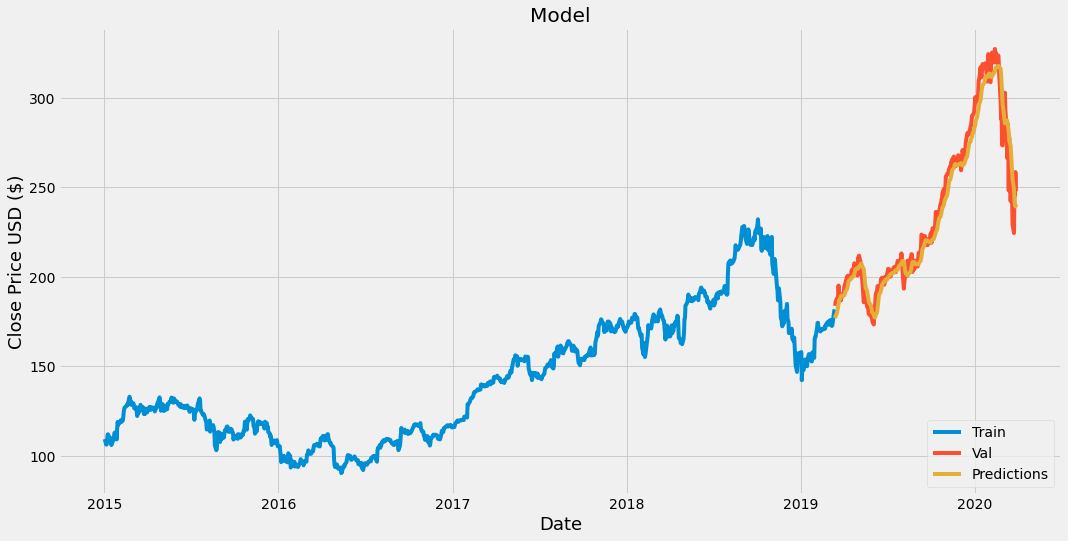

In [66]:
train= data[:training_data_len]
valid= data[training_data_len:]
valid['Predictions']= predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc= 'lower right')
plt.show

In [67]:
valid

,Close,Predictions
Date,,
2019-03-14,183.729996,176.804977
2019-03-15,186.119995,178.199081
2019-03-18,188.020004,179.845642
2019-03-19,186.529999,181.660828
2019-03-20,188.160004,183.218582
...,...,...
2020-03-23,224.369995,249.129486
2020-03-24,246.880005,243.379852
2020-03-25,245.520004,240.460663


In [69]:
apple_quote= web.DataReader('AAPL',data_source='yahoo', start='2015-01-01', end='2020-03-30')
new_df= apple_quote.filter(['Close'])
last_60_days= new_df[-60:].values
last_60_days_scaled= scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test= np.array(X_test)
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price= model.predict(X_test)
pred_price= scaler.inverse_transform(pred_price)
print(pred_price)

[[241.94931]]


In [70]:
apple_quote2=web.DataReader('AAPL',data_source='yahoo', start='2020-03-03', end='2020-03-03')
print(apple_quote2['Close'])

Date
2020-03-03    289.320007
Name: Close, dtype: float64
